<a href="https://colab.research.google.com/github/hrithikpurwar/ML/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

In [55]:
df=pd.read_table('/content/insurance.csv',sep=',')

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


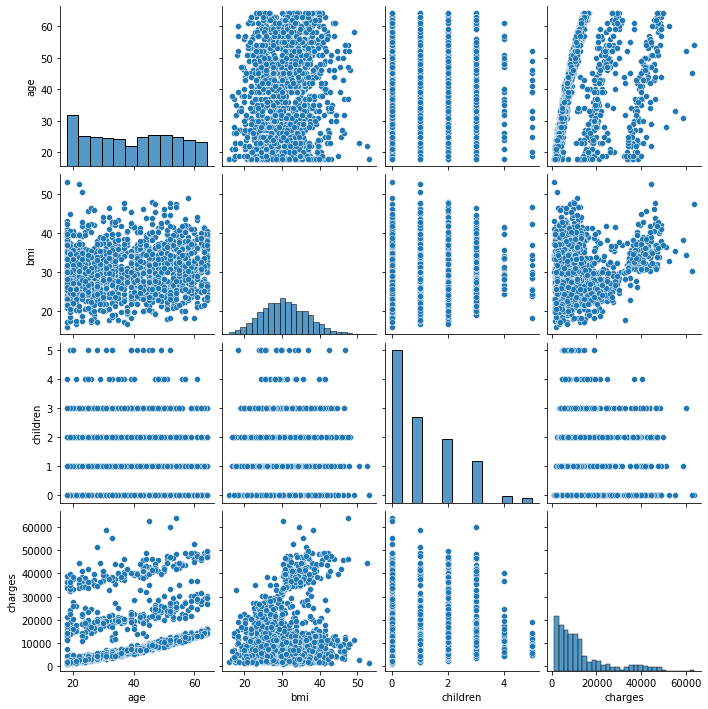

In [14]:
sns.pairplot(df)

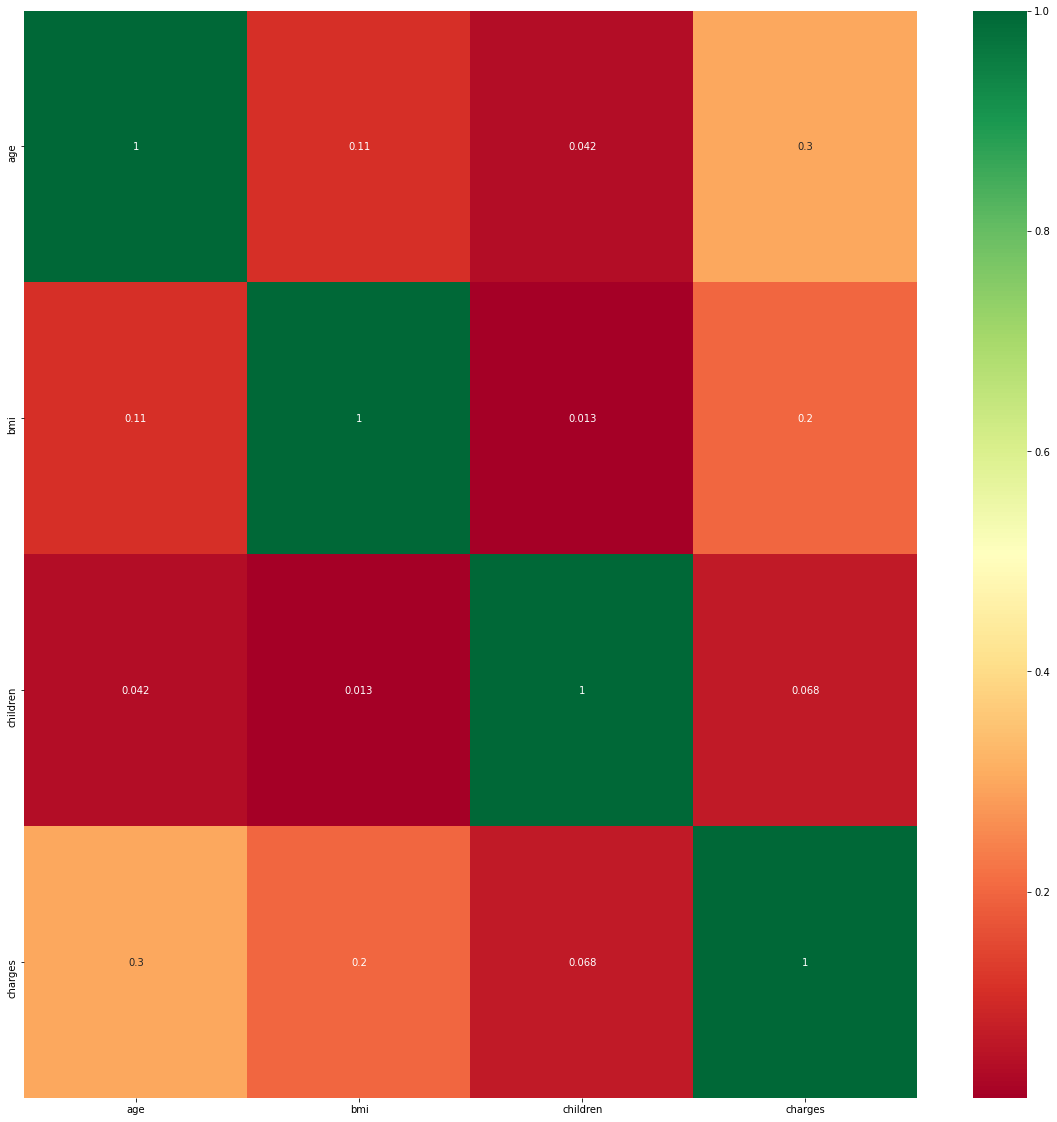

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())


['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [17]:
df=pd.get_dummies(df,drop_first=True)

In [18]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


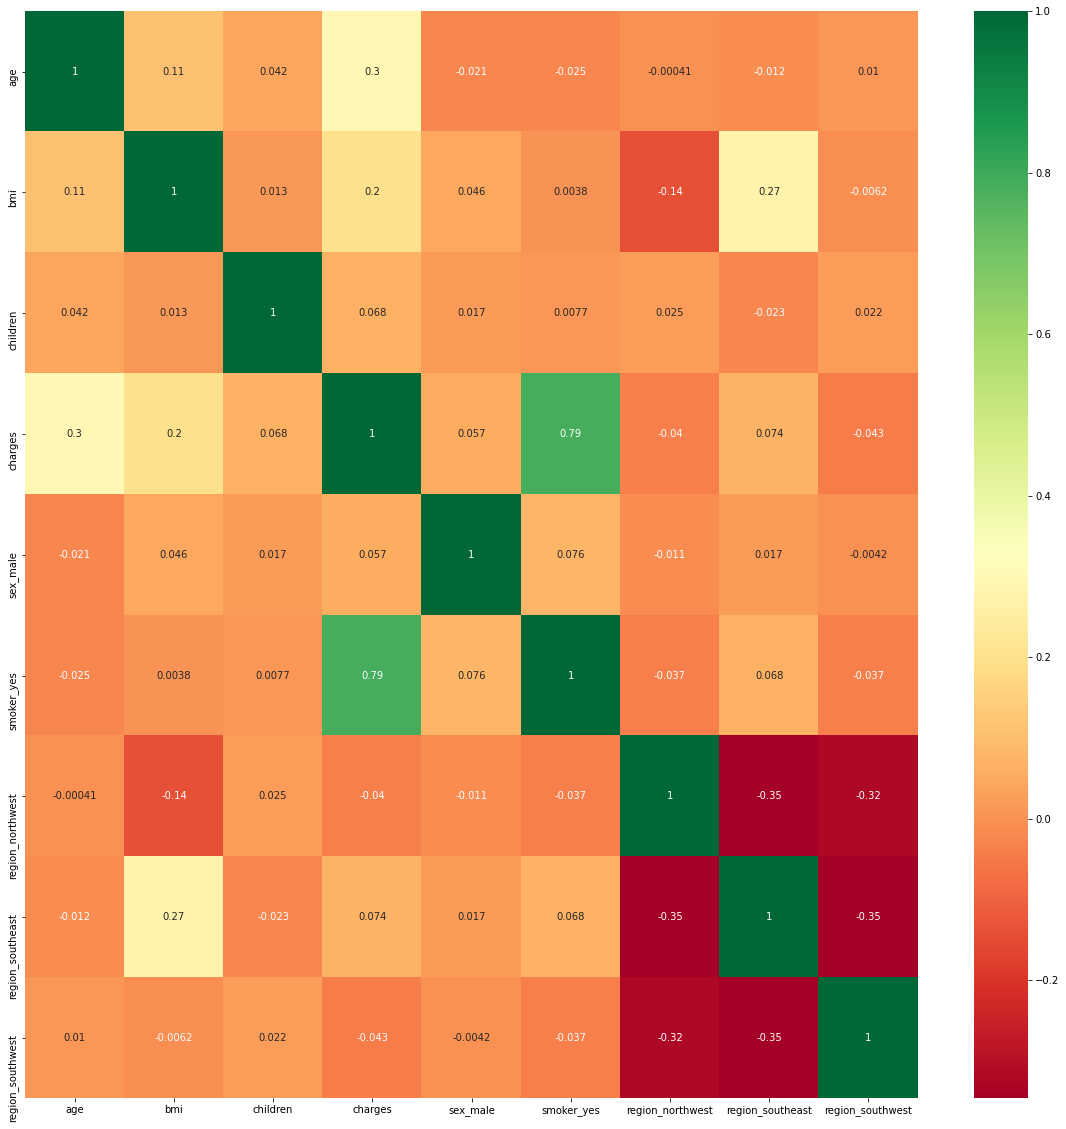

In [19]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [20]:
df['charge']=df['charges']
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charge
0,19,27.900,0,16884.92400,0,1,0,0,1,16884.92400
1,18,33.770,1,1725.55230,1,0,0,1,0,1725.55230
2,28,33.000,3,4449.46200,1,0,0,1,0,4449.46200
3,33,22.705,0,21984.47061,1,0,1,0,0,21984.47061
4,32,28.880,0,3866.85520,1,0,1,0,0,3866.85520


In [21]:
df=df.drop(['charges'],axis=1)

In [22]:
df.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charge
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520


In [23]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,8].values


In [24]:
X

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])

In [25]:
Y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [31]:
X_train

array([[18.   , 28.215,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [39.   , 32.8  ,  0.   , ...,  0.   ,  0.   ,  1.   ],
       [52.   , 46.75 ,  5.   , ...,  0.   ,  1.   ,  0.   ],
       ...,
       [40.   , 25.08 ,  0.   , ...,  0.   ,  1.   ,  0.   ],
       [19.   , 35.53 ,  0.   , ...,  1.   ,  0.   ,  0.   ],
       [33.   , 18.5  ,  1.   , ...,  0.   ,  0.   ,  1.   ]])

In [28]:
df.shape

(1338, 9)

In [37]:
from sklearn.svm import SVR
svrregressor= SVR(kernel='rbf') #can be any kernel based on datapoints
svrregressor.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [38]:
Y_pred=svrregressor.predict(X_test)


In [44]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE: 8674.694535379573
MSE: 173591686.71767735
RMSE: 13175.419792844452


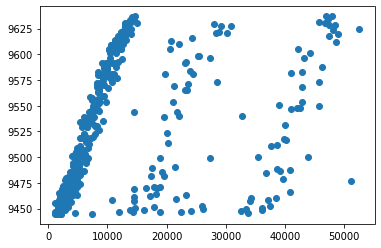

In [45]:
plt.scatter(Y_test,Y_pred)

In [46]:
print('Score:',svrregressor.score(X_test, Y_test) * 100)

Score: -8.855752791529037


In [48]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100, random_state=0)

In [49]:
from sklearn.svm import SVR
svrregressor= SVR(kernel='linear') #can be any kernel based on datapoints
svrregressor.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [50]:
Y_pred=svrregressor.predict(X_test)

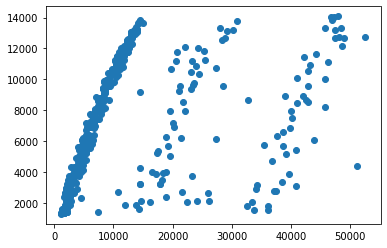

In [51]:
plt.scatter(Y_test,Y_pred)

In [54]:
print('Score:',svrregressor.score(X_test, Y_test) * 100)

Score: -11.263258717034109


In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [58]:
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [59]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [60]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [61]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [62]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [64]:
print(" Shape of x_train = ", X_train.shape)
print(" Shape of x_test = ", X_test.shape)
print(" Shape of y_train = ", Y_train.shape)
print(" Shape of y_test = ", Y_test.shape)

 Shape of x_train =  (936, 6)
 Shape of x_test =  (402, 6)
 Shape of y_train =  (936,)
 Shape of y_test =  (402,)


In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr = LinearRegression() 
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
Y_pred = lr.predict(X_test)
Y_pred_df = pd.DataFrame(Y_pred, columns=["Predicted Values" ])
Y_test_df = pd.DataFrame(np.array(Y_test), columns=["Real Values"])
pd.concat([Y_test_df , Y_pred_df] , axis=1)

,Real Values,Predicted Values
0,9724.53000,11051.549098
1,8547.69130,9821.281107
2,45702.02235,37867.572209
3,12950.07120,16125.705792
4,9644.25250,6920.271325
...,...,...
397,3277.16100,7163.959140
398,17942.10600,26454.585591
399,10226.28420,14277.024077
400,14418.28040,17354.845390


In [70]:
from sklearn.metrics import r2_score , mean_squared_error
score = r2_score(Y_test , Y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%".format(score * 100))

R2 Score : 0.7911113876316934
Model Accuracy: 79.11113876316934%


In [71]:
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE: 4013.6929857811974
MSE: 33311355.281859953
RMSE: 5771.59902296235


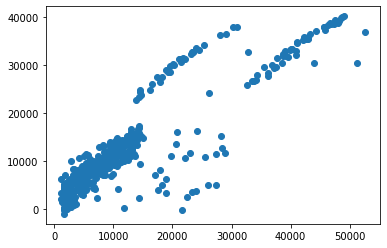

In [72]:
plt.scatter(Y_test,Y_pred)

In [76]:
import pickle
pickle_out = open("capstone.pkl","wb")
pickle.dump(lr, pickle_out)
pickle_out.close()

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
